# Bloco 2

<p align="justify">
Este trabalho é referente as tarefas desenvolvidas no Bloco 2. Espera-se desenvolver um projeto capaz de utilizar os comandos aprendidos pela linguagem de programação Python, na disciplina de Aprendizado de Máquina, além de desenvolver um sistema de previsão através de Machine Learning. Neste bloco, as discentes estão aplicando modelos de treinamento de Machine Learning e analisando o metódo que melhor se adequa a target e os features estabelecidos. O grupo desenvolvedor é composto pelas discentes:
<p align="justify">
Isabela Bento Beneti </p>
<p align="justify">
Monyque Karoline de Paula Silva </p>
<p align="justify">
Sofia Baccega C.C. de Oliveira </p>
<p align="justify">
Sophia Figueiredo Michel </p>
<hr>

### **COLETA DE DADOS**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from itertools import product
from matplotlib import pyplot as plt

In [2]:
#Dados do Cerrado Brasileiro, armazenados mensalmente via .csv
arquivos = ['janeiro.csv','fev.csv','marco.csv','abril.csv','maio.csv','junho.csv','julho.csv']

In [3]:
def read_csv(list_of_files):
    dfs = []
    for x in list_of_files:
        file = pd.read_csv(x, sep=',')
        dfs.append(file)
    df = pd.concat(dfs).reset_index(drop=True)
        
    return df

In [4]:
meses = read_csv(arquivos)

In [5]:
#Dados trabalhados para a eliminação de NaN nas colunas e identificação dos tipos de dados
meses.convert_dtypes()
meses.dropna(how='any', inplace=True)

In [6]:
meses.drop(columns=['Unnamed: 0','estado', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma'], axis = 1, inplace=True)

In [7]:
meses_fogo = meses['risco_fogo'] > 0
meses = meses[meses_fogo]

In [8]:
meses = meses.reset_index()
del meses['index']
display(meses)

,lat,lon,data_hora_gmt,numero_dias_sem_chuva,precipitacao,risco_fogo
0,-12.314859,-43.234066,2022-03-02 01:05:48,9.0,2.7,1.0
1,-20.227880,-46.415940,2022-03-02 01:28:00,8.0,0.0,0.3
2,-20.229250,-46.426820,2022-03-02 01:28:00,8.0,0.0,0.3
3,-20.238930,-46.425510,2022-03-02 01:28:00,8.0,0.0,0.4
4,-20.237550,-46.414600,2022-03-02 01:28:00,8.0,0.0,0.4
...,...,...,...,...,...,...
265136,-6.360000,-45.670000,2022-07-29 23:54:47,46.0,0.0,1.0
265137,-6.360000,-45.690000,2022-07-29 23:54:47,46.0,0.0,1.0
265138,-6.400000,-44.140000,2022-07-29 23:54:47,34.0,0.0,1.0
265139,-6.350000,-45.670000,2022-07-29 23:54:47,46.0,0.0,1.0


<hr>

### DEFINIÇÕES DE TREINO E TESTE - PARAMETRIZAÇÕES

In [9]:
TAMANHO_TESTE = 0.1 # fração de dados utilizada para teste: 10%
SEMENTE_ALEATORIA = 61455 # semente escolhida aleatoriamente
DATASET_NAME = "meses"
FEATURES = ["numero_dias_sem_chuva", "precipitacao", "lat", "lon"]
TARGET = ["risco_fogo"]

indices = meses.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

meses_treino = meses.loc[indices_treino]
meses_teste = meses.loc[indices_teste]

X_treino = meses_treino.reindex(FEATURES, axis=1).values
y_treino = meses_treino.reindex(TARGET, axis=1).values
X_teste = meses_teste.reindex(FEATURES, axis=1).values
y_teste = meses_teste.reindex(TARGET, axis=1).values

<hr>

### **TREINO DE MODELOS NORMALIZADOS:**

In [10]:
#Normalização
normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino)
normalizador_y.fit(y_treino)

MinMaxScaler()

## 1. Baseline

In [11]:
# Criar  o modelo
modelo_baseline = DummyRegressor()
# Treinar o modelo
modelo_baseline.fit(normalizador_x.transform(X_treino),normalizador_y.transform(y_treino))

# Realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(normalizador_x.transform(X_treino))
print(previsao)

[0.84847435 0.84847435 0.84847435 ... 0.84847435 0.84847435 0.84847435]


In [12]:
#Análise do RMSE
y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(normalizador_x.transform(X_teste))

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE}")

O RMSE do modelo baseline foi de 0.25423701029201057


##### MODELO DE PREVISÃO

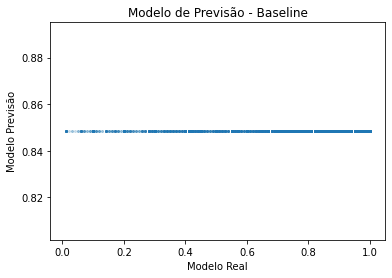

In [13]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Baseline")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS 

Este modelo realiza a média de todos os valores normalizados do modelo, apresentando uma resolução com eficiência baixa, a qual possui 25% de erro de predição.

## 2. K-vizinhos mais próximos

In [14]:
# cria o modelo
modelo_knm = KNeighborsRegressor()

# treina o modelo
modelo_knm.fit(normalizador_x.transform(X_treino),normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_knm.predict(normalizador_x.transform(X_treino))
previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

[[1.  ]
 [1.  ]
 [0.97]
 ...
 [1.  ]
 [0.98]
 [1.  ]]


#### Hiperparâmetros - Analisar qual o melhor k-NN

In [15]:
erro = []

for n in range(1, 11):
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

    y_verdadeiro = normalizador_y.transform(y_teste)
    y_previsao = modelo_knn.predict(normalizador_x.transform(X_teste))
    y_previsao = normalizador_y.inverse_transform(y_previsao)
    erro.append(np.mean(y_previsao != y_verdadeiro))

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k = {n} foi de {RMSE}.")

O RMSE do modelo k-NN usando k = 1 foi de 0.06953842803629365.
O RMSE do modelo k-NN usando k = 2 foi de 0.07485483811300009.
O RMSE do modelo k-NN usando k = 3 foi de 0.08021297405419235.
O RMSE do modelo k-NN usando k = 4 foi de 0.0847446520511005.
O RMSE do modelo k-NN usando k = 5 foi de 0.08843453046819148.
O RMSE do modelo k-NN usando k = 6 foi de 0.09124067072839374.
O RMSE do modelo k-NN usando k = 7 foi de 0.09396136661637541.
O RMSE do modelo k-NN usando k = 8 foi de 0.09655897528356704.
O RMSE do modelo k-NN usando k = 9 foi de 0.09885719729467433.
O RMSE do modelo k-NN usando k = 10 foi de 0.10112777102375806.


##### ANÁLISE DOS RESULTADOS OBTIDOS 

Observou-se que em números menores de vizinhos, há uma melhor predição do modelo devido a diminuição da taxa de erro. De modo a realizar esta análise por um meio visual, desenvolve-se uma representação por meio de um gráfico que demonstra a taxa de erro do treino conforme há a mudança dos vizinhos (*k*).

##### REPRESENTAÇÃO VISUAL DO MELHOR *K*

Text(0, 0.5, 'Erro')

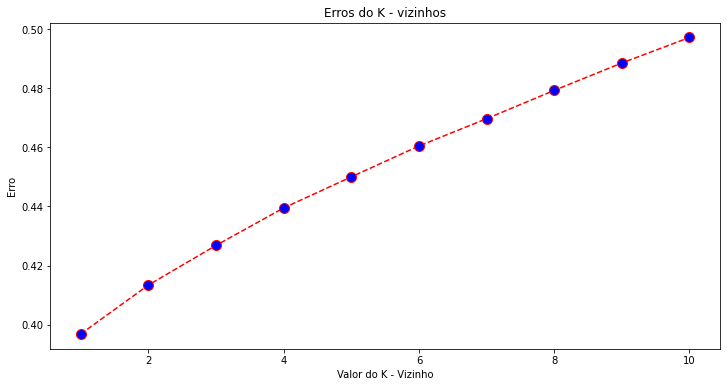

In [16]:
#Plot e caracterização do gráfico
plt.figure(figsize=(12, 6))  
# K analisados de 1 a 10.
plt.plot(range(1, 11), erro, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Erros do K - vizinhos')  
plt.xlabel('Valor do K - Vizinho')  
plt.ylabel('Erro') 

##### MODELO DE PREVISÃO

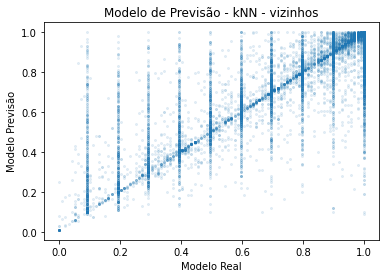

In [17]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - kNN - vizinhos")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### Comparação Baseline & K-NN 

O metódo de k-vizinhos mais próximos foi utilizado com a realização de dez *k* distintos que vão de um a dez. Após uma série de testes, obteve-se os seguintes resultados de RSME:

 <ul>
 <li> O RMSE do modelo k-NN usando k = 1 foi de 0.06953842803629365.  </li>
 <li> O RMSE do modelo k-NN usando k = 2 foi de 0.07485483811300009.  </li>
 <li> O RMSE do modelo k-NN usando k = 3 foi de 0.08021297405419235.  </li>
 <li> O RMSE do modelo k-NN usando k = 4 foi de 0.0847446520511005.   </li>
 <li> O RMSE do modelo k-NN usando k = 5 foi de 0.08843453046819148.  </li>
 <li> O RMSE do modelo k-NN usando k = 6 foi de 0.09124067072839374.  </li>
 <li> O RMSE do modelo k-NN usando k = 7 foi de 0.09396136661637541.  </li>
 <li> O RMSE do modelo k-NN usando k = 8 foi de 0.09655897528356704.  </li>
 </ul>

Nestes resultados, observou-se que o erro do modelo apresenta uma taxa de aproximadamente 6 - 10%. Esse modelo ao ser comparado com o Baseline, demonstra uma maior eficiência visto que ela é uma taxa bem menor ao ser comparada com a taxa de 25% de erro do treino obtido com o Baseline. 

<AxesSubplot:ylabel='Frequency'>

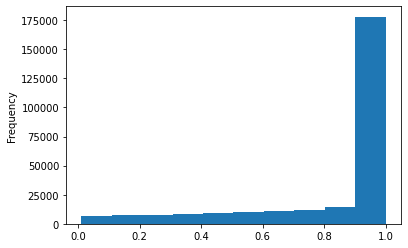

In [18]:
meses['risco_fogo'].plot(kind='hist')

## 3. Modelo de Regressão Linear

In [19]:
# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_linear.predict(normalizador_x.transform(X_treino))
previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

[[0.88141621]
 [0.81105356]
 [0.85321921]
 ...
 [0.8747693 ]
 [0.87064896]
 [0.88084116]]


In [20]:
y_verdadeiro = y_teste
y_previsao = modelo_linear.predict(normalizador_x.transform(X_teste))
y_previsao = normalizador_y.inverse_transform(y_previsao)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE}")

O RMSE do modelo linear foi de 0.23769024621130785


##### MODELO DE PREVISÃO

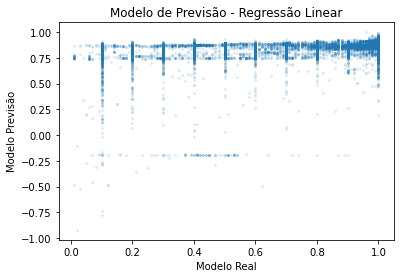

In [21]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Regressão Linear")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS 
##### Comparação Baseline & Regressão Linear

O metódo de regressão linear, obteve como RSME:

 <ul>
 <li> O RMSE do modelo linear foi de 0.23769024621130785.  </li>
</ul>

Dado o resultado, observou-se que o erro do modelo apresenta uma taxa de erro de aproximadamente de 23%. Esse modelo ao ser comparado com o Baseline, demonstra apresenta uma eficiência similar ao Baseline, devido a diferença das taxas ser de aproximadamente 2%.

## 4. Árvore de Decisão

In [22]:
# cria o modelo
modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao)

[0.5959596 0.5959596 0.5959596 ... 0.5959596 0.5959596 0.5959596]


In [23]:
y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(normalizador_x.transform(X_teste))

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo de árvore de decisões foi de {RMSE}.")

O RMSE do modelo de árvore de decisões foi de 0.08196837971262753.


##### HIPERPARÂMETROS - MODELO BASEADO NO MATERIAL EM SALA

In [24]:
NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

    y_verdadeiro = y_teste
    y_previsao = modelo_dt.predict(normalizador_x.transform(X_teste))

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f}."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=None foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=10 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=None foi de 0.17.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=10 foi de 0.17.


##### HIPERPARÂMETROS - ALTERAÇÃO DOS HIPERPARÂMETROS

In [25]:
NUM_FOLHAS = [None, 4, 10]
NUM_PROFUNDIDADE = [None, 5, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_ad2 = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_ad2.fit(X_treino, y_treino)

    y_verdadeiro_ad2 = y_teste
    y_previsao_ad2 = modelo_ad2.predict(X_teste)
    RMSE_ad2 = mean_squared_error(y_verdadeiro_ad2, y_previsao_ad2, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE_ad2:.2f}."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=5 foi de 0.18.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15.
O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=None foi de 0.21.
O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=5 foi de 0.21.
O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=10 foi de 0.21.
O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=None foi de 0.19.
O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=5 foi de 0.19.
O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=10 foi de 0.19.


##### REPRESENTAÇÃO VISUAL DA ÁRVORE DE DECISÕES

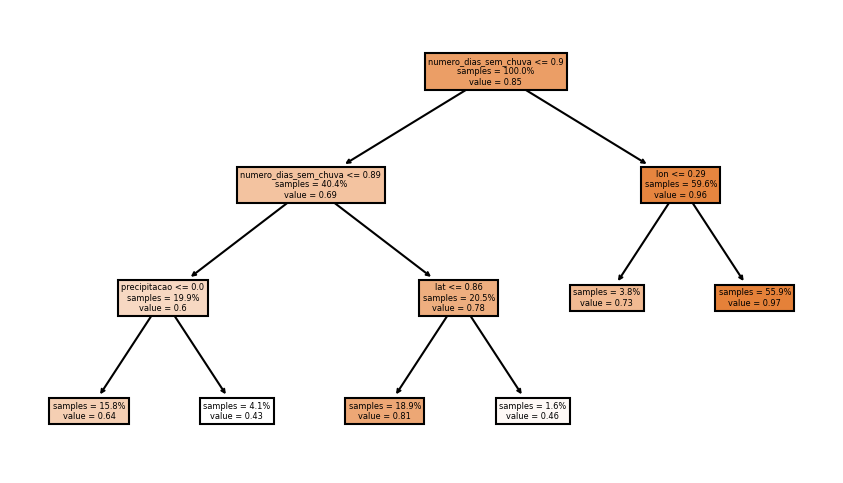

In [26]:
# cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=150,
)

# plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# mostra o plot para o usuário
plt.show()

##### MODELO DE PREVISÃO

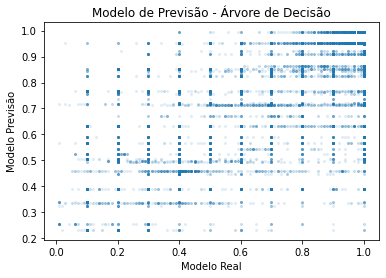

In [27]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Árvore de Decisão")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS 
##### Comparação Baseline & Árvore de Decisão

Este modelo, usufrui da utilização de dois hiperparâmetros que foram alterados de acordo com o desejo das discentes. Dada as alterações dos hiperparâmetros, os RMSE obtidos foram de:
<ul>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=5 foi de 0.18. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=None foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=5 foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=10 foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=None foi de 0.19. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=5 foi de 0.19. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=10 foi de 0.19.</li>
</ul>

Estes RMSE apresentam uma grande margem de variação, visto que as taxas vão de 8-21%. Nesse sentido observa-se que aquelas em que o max_depht são igualadas a None, os valores de erro serão menores.

## 5. Floresta aleatória

In [ ]:
# alterando o formato do target
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

# Criação do Modelo
modelo_flore = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

normalizacao = MinMaxScaler()
X_treino_norm = normalizacao.fit_transform(X_treino)
X_teste_norm = normalizacao.transform(X_teste)
modelo_flore.fit(X_treino_norm, y_treino)

previsao = modelo_flore.predict(X_teste_norm)

print(previsao)

(238626, 1) (26515, 1)
(238626,) (26515,)


In [ ]:
y_verdadeiro = y_teste
y_previsao = modelo_flore.predict(X_teste_norm)

RMSE_flore = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo de floresta aleatória foi de {RMSE_flore}.")

##### DEFINIÇÃO DE HIPERPARÂMETROS - MODELO BASEADO EM SALA

In [ ]:
NUM_ARVORES = [10, 100, 300]
NUM_FOLHAS = [None, 6]
NUM_PROFUNDIDADE = [None, 3]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino_norm, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste_norm)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f}."
    )

##### DEFINIÇÃO DE HIPERPARÂMETROS - MODELO ALTERAÇÕES

In [ ]:
NUM_ARVORES = [10, 150, 275]
NUM_FOLHAS = [None, 8]
NUM_PROFUNDIDADE = [None, 4]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino_norm, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste_norm)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f}."
    )

##### MODELO DE PREVISÃO

In [ ]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Floresta Aleatória")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS 

##### ANALISANDO A IMPORTÂNCIA DAS FEATURES

In [ ]:
importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()

##### Comparação Baseline & Floresta Aleatória

Este modelo, usufrui da utilização de três hiperparâmetros que foram alterados de acordo com o desejo das discentes. Dada as alterações dos hiperparâmetros, os RMSE obtidos foram de:
<ul>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=5 foi de 0.18. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=None foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=5 foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=10 foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=None foi de 0.19. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=5 foi de 0.19. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=10 foi de 0.19.</li>
</ul>

Estes RMSE apresentam uma grande margem de variação, visto que as taxas vão de 8-21%. Nesse sentido observa-se que aquelas em que o max_depht são igualadas a None, os valores de erro serão menores.

<hr>

### **TREINO DE MODELOS NÃO - NORMALIZADOS:**

## 1. Baseline

In [ ]:
# cria o modelo
modelo_baseline = DummyRegressor()
# treina o modelo
modelo_baseline.fit(X_treino, y_treino)
# realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(X_teste)
print(previsao)

In [ ]:
y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(X_teste)
RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo baseline foi de {RMSE}.")

In [ ]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Baseline")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

#### ANÁLISE DOS RESULTADOS OBTIDOS

Este modelo realiza a média de todos os valores normalizados do modelo, apresentando uma resolução com eficiência baixa, a qual possui 25% de erro de predição.

## 2. K-vizinhos mais próximos

In [ ]:
# cria o modelo
modelo_knm = KNeighborsRegressor()

# treina o modelo
modelo_knm.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knm.predict(X_treino)
print(previsao)

#### Hiperparâmetros - Analisar qual o melhor k-NN

In [ ]:
erro = []

for n in range(1, 11):
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    erro.append(np.mean(y_previsao != y_verdadeiro))

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k = {n} foi de {RMSE}.")

##### ANÁLISE DOS RESULTADOS OBTIDOS 

Observou-se que em números menores de vizinhos, há uma melhor predição do modelo devido a diminuição da taxa de erro. De modo a realizar esta análise por um meio visual, desenvolve-se uma representação por meio de um gráfico que demonstra a taxa de erro do treino conforme há a mudança dos vizinhos (*k*).

##### REPRESENTAÇÃO VISUAL DO MELHOR *K*

In [ ]:
#Plot e caracterização do gráfico
plt.figure(figsize=(12, 6))  
# K analisados de 1 a 10.
plt.plot(range(1, 11), erro, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Erros do K - vizinhos')  
plt.xlabel('Valor do K - Vizinho')  
plt.ylabel('Erro') 

##### MODELO DE PREVISÃO

In [ ]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - kNN - vizinhos")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### Comparação Baseline & K-NN 

O metódo de k-vizinhos mais próximos foi utilizado com a realização de dez *k* distintos que vão de um a dez. Após uma série de testes, obteve-se os seguintes resultados de RSME:

 <ul>
 <li> O RMSE do modelo k-NN usando k = 1 foi de 0.08039338505468364.  </li>
 <li> O RMSE do modelo k-NN usando k = 2 foi de 0.08407120869385942.  </li>
 <li> O RMSE do modelo k-NN usando k = 3 foi de 0.08834040689107614.  </li>
 <li> O RMSE do modelo k-NN usando k = 4 foi de 0.09253239184951216.  </li>
 <li> O RMSE do modelo k-NN usando k = 5 foi de 0.09618881660830106.  </li>
 <li> O RMSE do modelo k-NN usando k = 6 foi de 0.09913987743295201.  </li>
 <li> O RMSE do modelo k-NN usando k = 7 foi de 0.1021576465805423.   </li>
 <li> O RMSE do modelo k-NN usando k = 8 foi de 0.1046688394568031.   </li>
 <li> O RMSE do modelo k-NN usando k = 9 foi de 0.10709593590475591.  </li>
 <li> O RMSE do modelo k-NN usando k = 10 foi de 0.10954420439863449. </li>
 </ul>

Nestes resultados, observou-se que o erro do modelo apresenta uma taxa de aproximadamente 8 - 10%. Esse modelo ao ser comparado com o Baseline, demonstra uma maior eficiência visto que ela é uma taxa bem menor ao ser comparada com a taxa de 25% de erro do treino obtido com o Baseline. 

## 3. Modelo de Regressão Linear

In [ ]:
# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_linear.predict(X_teste)
print(previsao)

In [ ]:
y_verdadeiro = y_teste
y_previsao = modelo_linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE}.")

##### MODELO DE PREVISÃO

In [ ]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Linear")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS

##### Comparação Baseline & Modelo Linear

O metódo de regressão linear, obteve como RSME:

 <ul>
 <li> O RMSE do modelo linear foi de 0.23769024621130785.  </li>
</ul>

Dado o resultado, observou-se que o erro do modelo apresenta uma taxa de erro de aproximadamente de 23%. Esse modelo ao ser comparado com o Baseline, demonstra apresenta uma eficiência similar ao Baseline, devido a diferença das taxas ser de aproximadamente 2%.

## 4. Árvore de Decisão

In [ ]:
# cria o modelo
modelo_ad = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_ad.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao_ad = modelo_ad.predict(X_teste)
print(previsao_ad)

In [ ]:
y_verdadeiro = y_teste
y_previsao = modelo_ad.predict(X_teste)

RMSE_ad = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE_ad}.")

#### HIPERPARÂMETROS - MODELO BASEADO NO MATERIAL EM SALA

In [ ]:
NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_ad = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_ad.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_ad.predict(X_teste)
    RMSE_ad = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE_ad:.2f}."
    )

#### HIPERPARÂMETROS - ALTERAÇÃO DOS HIPERPARÂMETROS

In [ ]:
NUM_FOLHAS = [None, 4, 10]
NUM_PROFUNDIDADE = [None, 5, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_ad2 = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_ad2.fit(X_treino, y_treino)

    y_verdadeiro_ad2 = y_teste
    y_previsao_ad2 = modelo_ad2.predict(X_teste)
    RMSE_ad2 = mean_squared_error(y_verdadeiro_ad2, y_previsao_ad2, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE_ad2:.2f}."
    )

#### REPRESENTAÇÃO VISUAL DA ÁRVORE DE DECISÕES

In [ ]:
# cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(X_treino, y_treino)

# cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=150,
)

# plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# mostra o plot para o usuário
plt.show()

#### MODELO DE PREVISÃO

In [ ]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Árvore de Decisão")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS

##### Comparação Baseline & Árvore de Decisões

Este modelo, usufrui da utilização de dois hiperparâmetros que foram alterados de acordo com o desejo das discentes. Dada as alterações dos hiperparâmetros, os RMSE obtidos foram de:
<ul>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=5 foi de 0.18. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=None foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=5 foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=10 foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=None foi de 0.19. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=5 foi de 0.19. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=10 foi de 0.19.</li>
</ul>

Estes RMSE apresentam uma grande margem de variação, visto que as taxas vão de 8-21%. Nesse sentido observa-se que aquelas em que o max_depht são igualadas a None, os valores de erro serão menores.

## 5. Floresta aleatória

In [ ]:
# alterando o formato do target
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

# cria o modelo
modelo_ad2 = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_ad2.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao_ad2 = modelo_ad2.predict(X_teste)
print()
print(previsao_ad2)

In [ ]:
y_verdadeiro = y_teste
y_previsao = modelo_ad2.predict(X_teste)

RMSE_ad2 = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE_ad2}.")

##### HIPERPARÂMETROS - MODELO BASEADO NO EM SALA

In [ ]:
NUM_ARVORES = [10, 100, 300]
NUM_FOLHAS = [None, 6]
NUM_PROFUNDIDADE = [None, 3]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino_norm, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste_norm)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f}."
    )

##### HIPERPARÂMETROS - MODELO COM ALTERAÇÕES

In [ ]:
NUM_ARVORES = [10, 150, 275]
NUM_FOLHAS = [None, 8]
NUM_PROFUNDIDADE = [None, 4]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f}."
    )

#### MODELO DE PREVISÃO

In [ ]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Floresta Aleatória")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS

##### ANÁLISE DA IMPORTÂNCIA DAS FEATURES

In [ ]:
importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()

##### Comparação Baseline & Floresta Aleatória

Este modelo, usufrui da utilização de três hiperparâmetros que foram alterados de acordo com o desejo das discentes. Dada as alterações dos hiperparâmetros, os RMSE obtidos foram de:
<ul>
<li> O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 0.07. </li>
<li> O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=None e max_depth=None foi de 0.07. </li>
<li> O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=None e max_depth=None foi de 0.07. </li>
<li> O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=4 foi de 0.19.     </li>
<li> O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=None e max_depth=4 foi de 0.19.    </li>
<li> O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=None e max_depth=4 foi de 0.19.    </li>
<li> O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=8 e max_depth=None foi de 0.19.     </li>
<li> O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=8 e max_depth=None foi de 0.19.    </li>
<li> O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=8 e max_depth=None foi de 0.19.    </li>
<li> O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=8 e max_depth=4 foi de 0.19.        </li>
<li> O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=8 e max_depth=4 foi de 0.19.       </li>
<li> O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=8 e max_depth=4 foi de 0.19.       </li>
</ul>

Estes RMSE apresentam uma grande margem de variação, visto que as taxas vão de 7-19%. Nesse sentido observa-se que aquelas em que o max_depht são igualadas a None, os valores de erro serão menores.

<hr>

## **DESENVOLVA UM CLASSIFICADOR**